# 8.2 Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

Esse método também é chamado de método de _Euler-Cauchy_ ou _ponto-inclinação_.

### Exemplo

Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.



**Solução**
Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

pontos xi: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
pontos yi: [1.0, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


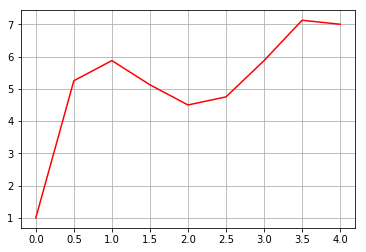

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

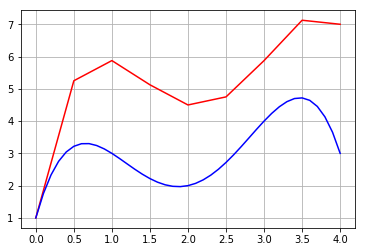

In [2]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)
Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.


### Exemplo
Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

pontos xi: [0.  0.2 0.4 0.6 0.8 1. ]
pontos yi: [2.0, 2.0, 2.04, 2.112, 2.2096, 2.32768]


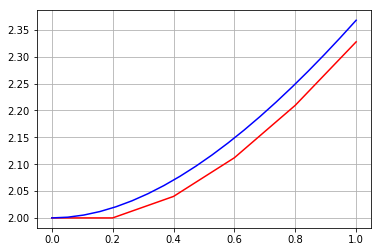

In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

h = 0.20 #passo
x0 = 0.0
xn = 1.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [2.0]                  

# entramos com f(x,y)
f = lambda x,y: x-y+2

# laço para ir calculando os yi e preenchendo a lista
for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)


# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()